In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Supplementary figures

## Individuals' CGM summary (FigS2)

In [ ]:
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

In [ ]:
individual_root = './cgm_count_by_day/'

In [ ]:
def get_valid_list(filename):
    # key = id_key_dict[filename[:-4]]
    df = pd.read_csv(individual_root + filename)
    date_list = df['displayTime'].values.tolist()

    count_lst = list(df['Count'].values)
    start = datetime.strptime(date_list[0].split(' ')[0], '%Y-%m-%d').date()
    end = datetime.strptime(date_list[-1].split(' ')[0], '%Y-%m-%d').date()
    date_range = {start + timedelta(i): 0 for i in range((end - start).days + 1)}
    # print(count_lst)

    for i in range(len(date_list)):
      cur_date = datetime.strptime(date_list[i].split(' ')[0], '%Y-%m-%d').date()
      if count_lst[i] >= 202:
        date_range[cur_date] = 2
      elif count_lst[i] > 0 and count_lst[i] < 202:
        date_range[cur_date] = 1
      else:
        date_range[cur_date] = 0

    return list(date_range.values())
  # break

In [ ]:
from matplotlib import pyplot as plt

def stacked_bar_plot(combined_valid_list, subjects):
  fig, ax = plt.subplots(figsize=(10, 20))

  for j in range(len(combined_valid_list)):
    bottom = 0
    for i in range(len(combined_valid_list[j])):
      if combined_valid_list[j][i] == 0: # no data record
        ax.barh(j, 1, left=bottom, color = '#FFD166')
      elif combined_valid_list[j][i] == 1: # 0 - 70% data record
        ax.barh(j, 1, left=bottom, color = "#F78C6B")
      if combined_valid_list[j][i] == 2: # > 70% data record
        ax.barh(j, 1, left=bottom, color = "#06D6A0")
      bottom += 1

  valid_patch = mpatches.Patch(color="#06D6A0", label='High adherence')
  invalid_patch = mpatches.Patch(color="#F78C6B", label='Partial adherence')
  norecord_patch = mpatches.Patch(color='#FFD166', label='No adherence')
  ax.legend(handles=[valid_patch, invalid_patch, norecord_patch], fontsize = 16, shadow = True)

  ax.set_yticks(range(len(subjects)))
  ax.set_yticklabels(subjects)

  ax.set_ylabel("Subjects", fontsize=14)
  ax.set_xlabel("# of days", fontsize=14)

  for i in range(500, 2500, 500):
    ax.axvline(x = i, c='#073B4C', linestyle='--', alpha = .3)
  plt.ylim(-2,108 + 2)

  plt.savefig("./figures/individual_adherence.png", bbox_inches='tight')
  plt.savefig('./final_figures/supplementary/individual_adherence.png',bbox_inches='tight')
  plt.savefig('./final_figures/supplementary/individual_adherence.pdf',bbox_inches='tight')

  plt.show()

In [ ]:
df = pd.read_csv('./CGM_summary.csv')

id_list = list(df['Key'].values)
subjects = list(df['Subject'].values)

<ipython-input-29-f47a43b9e452>:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/SweetGoals/Revision Version/figures/individual_adherence.png", bbox_inches='tight')
<ipython-input-29-f47a43b9e452>:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('/content/drive/Shareddrives/Augmented Health Lab/Yanjun/SweetGoals/final_figures/supplementary/individual_adherence.png',bbox_inches='tight')
<ipython-input-29-f47a43b9e452>:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('/content/drive/Shareddrives/Augmented Health Lab/Yanjun/SweetGoals/final_figures/supplementary/individual_adherence.pdf',bbox_inches='tight')
<ipython-input-29-f47a43b9e452>:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('/content/drive/Shareddrives/Augmented Health Lab/

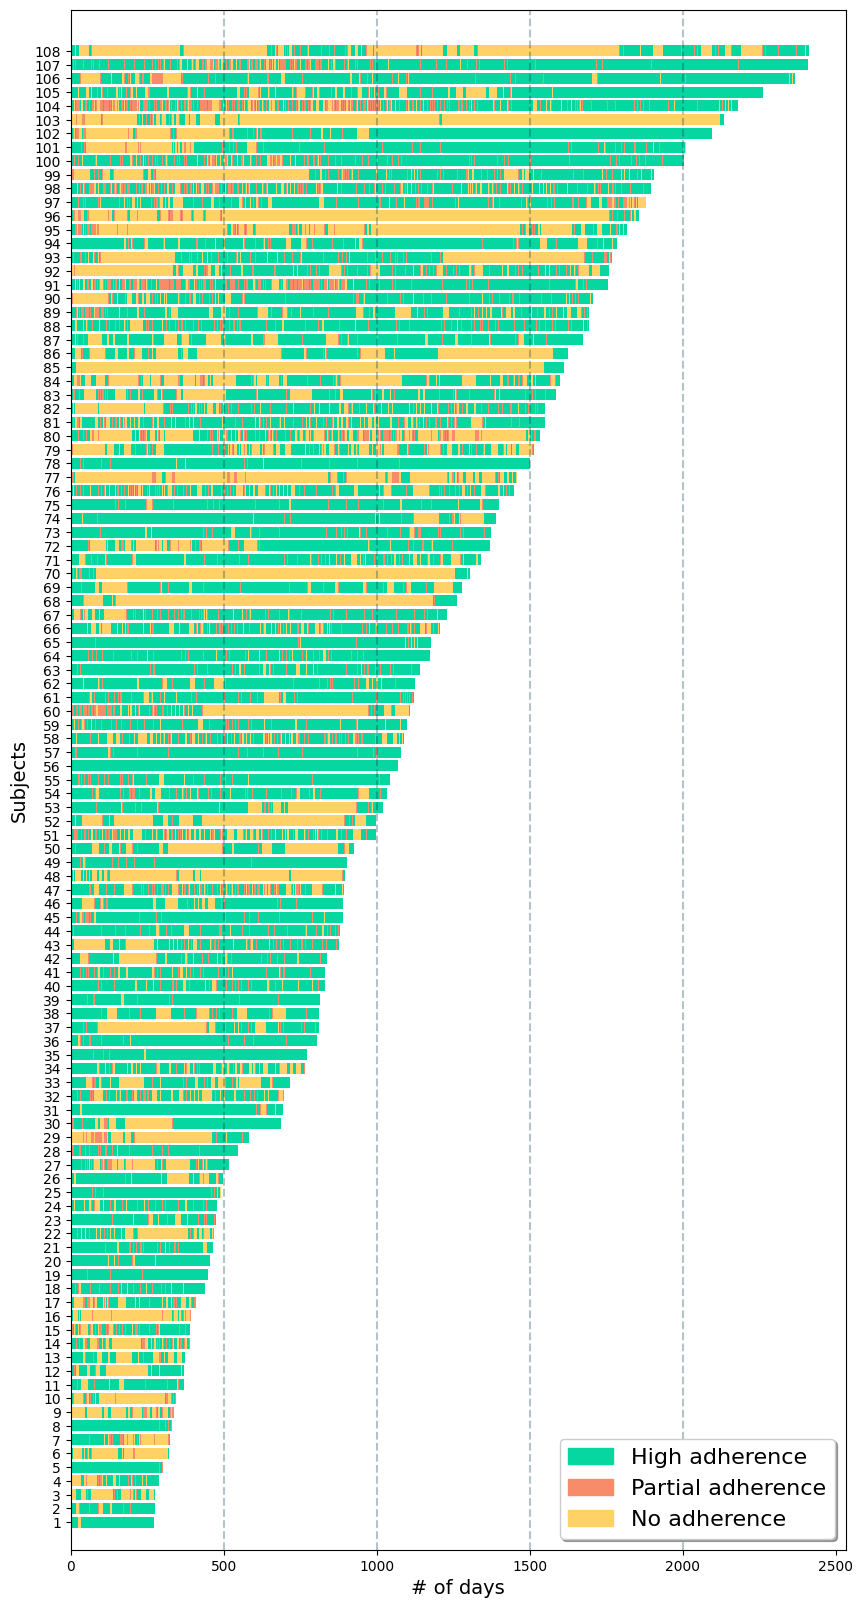

In [ ]:
combined_valid_list = []

for i in range(len(id_list)):
    filename = subjects[i] + '.csv'
    valid_list = get_valid_list(filename)
    # print(valid_list)
    combined_valid_list.append(valid_list)

# draw plots for three different terms
stacked_bar_plot(combined_valid_list, id_list)
# break

## CGM HIGH adherence days (FigS3)

In [1]:
df = pd.read_csv('./CGM_summary.csv')
df.head()

In [2]:
df['ValidRate'] = df.ValidDays / df.Duration * 100
valid_df = df[['Subject', 'ValidRate']]
valid_df.head()

In [3]:
valid_dict = {valid_df.Subject.values[i]:valid_df.ValidRate.values[i] for i in range(len(valid_df.Subject.values))}
valid_dict = dict(sorted(valid_dict.items(), key=lambda item: item[1]))

In [12]:
g1 = [i for i in list(valid_dict.values()) if i < 40]
g2 = [i for i in list(valid_dict.values()) if i < 70 and i >= 40]
g4 = [i for i in list(valid_dict.values()) if i >= 70]
print(len(g1), len(g2), len(g4))

22 29 57


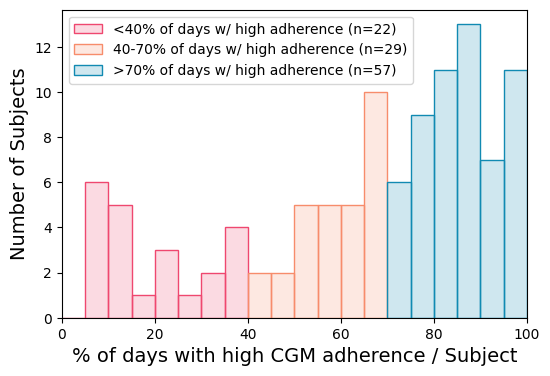

In [13]:
import seaborn as sns

fig = plt.figure(figsize=(6, 4))
bins = np.arange(0, 105, 5)

sns.histplot(g1, color = '#EF476F', edgecolor = '#EF476F', alpha = 0.2, bins=bins[:9], label='<40% of days w/ high adherence (n='+str(len(g1))+')')
sns.histplot(g2, color = '#F78C6B', edgecolor = '#F78C6B', alpha = 0.2, bins=bins[8:15], label='40-70% of days w/ high adherence (n='+str(len(g2))+')')
# sns.histplot(g3, kde=True, color = '#06D6A0', edgecolor = '#06D6A0', alpha = 0.05, binwidth = 2, label='50-70% of days with high adherence(n='+str(len(g3))+')')
sns.histplot(g4, color = '#118AB2', edgecolor = '#118AB2', alpha = 0.2, bins=bins[14:21], label='>70% of days w/ high adherence (n='+str(len(g4))+')')


plt.ylabel('Number of Subjects',  fontsize = 14)
plt.xlabel('% of days with high CGM adherence / Subject', fontsize = 14)
plt.xlim(0, 100)
plt.legend(ncol=1)

plt.savefig('./figures/highAdh_final.png', bbox_inches='tight')
plt.savefig('./final_figures/supplementary/FigS3_CGM_high_adherence.png',bbox_inches='tight')
plt.savefig('./final_figures/supplementary/FigS3_CGM_high_adherence.pdf',bbox_inches='tight')

plt.show()